In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
Songs_df1 = pd.read_csv('~/Desktop/reccomendation_data.csv')

In [3]:
Songs_df1.head()

,name,artist,spotify_id,preview,img,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist,valence_artist
0,Mood (feat. iann dior),24kGoldn,3tjFYV6RSFtuktYl3ZtYcq,https://p.scdn.co/mp3-preview/45cb08fdb67744ab...,https://i.scdn.co/image/ab67616d0000b273ff8c98...,0.700,0.722,-3.558,0.0369,0.22100,0.000000,0.2720,0.756,0.118269,0.731588,0.681235,0.000002,0.160000,0.123765,0.566824
1,Blinding Lights,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,NaN,https://i.scdn.co/image/ab67616d0000b2738863bc...,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,0.271439,0.574808,0.607873,0.010594,0.201728,0.086811,0.305189
2,Dynamite,BTS,0t1kP63rueHleOhQkYSXFY,https://p.scdn.co/mp3-preview/a707728846c105f4...,https://i.scdn.co/image/ab67616d0000b273755995...,0.746,0.765,-4.410,0.0993,0.01120,0.000000,0.0936,0.737,0.099350,0.614798,0.786452,0.000044,0.202608,0.128515,0.533369
3,ROCKSTAR (feat. Roddy Ricch),DaBaby,7ytR5pFWmSjzHJIeQkgog4,NaN,https://i.scdn.co/image/ab67616d0000b27320e08c...,0.746,0.690,-7.956,0.1640,0.24700,0.000000,0.1010,0.497,0.093113,0.829283,0.657626,0.000002,0.170425,0.284725,0.629374
4,For The Night (feat. Lil Baby & DaBaby),Pop Smoke,0PvFJmanyNQMseIFrU708S,NaN,https://i.scdn.co/image/ab67616d0000b27377ada0...,0.823,0.586,-6.606,0.2000,0.11400,0.000000,0.1930,0.347,0.191520,0.675143,0.702686,0.000194,0.247669,0.280103,0.490229


In [4]:
Songs_df1.shape

(65795, 20)

In [5]:
Songs_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65795 entries, 0 to 65794
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     65795 non-null  object 
 1   artist                   65793 non-null  object 
 2   spotify_id               65794 non-null  object 
 3   preview                  47398 non-null  object 
 4   img                      65791 non-null  object 
 5   danceability             65795 non-null  float64
 6   energy                   65795 non-null  float64
 7   loudness                 65795 non-null  float64
 8   speechiness              65795 non-null  float64
 9   acousticness             65795 non-null  float64
 10  instrumentalness         65795 non-null  float64
 11  liveness                 65795 non-null  float64
 12  valence                  65795 non-null  float64
 13  acousticness_artist      65795 non-null  float64
 14  danceability_artist   

In [6]:
Songs_df1.name.value_counts()

Home                                         29
You                                          25
Stay                                         22
Forever                                      21
Summertime                                   21
                                             ..
Divine / Sailing / Time / Hymn - Acoustic     1
OG Bobby Johnson                              1
Live Like We're Dying                         1
Lie, Cheat, Steal                             1
Patricia                                      1
Name: name, Length: 56924, dtype: int64

In [7]:
Songs_df1.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist,valence_artist
count,65795.000000,65795.000000,65795.000000,65795.000000,65795.000000,65795.000000,65795.000000,65795.000000,65795.000000,65795.000000,65795.000000,65795.000000,65795.000000,65795.000000,65795.000000
mean,0.576662,0.609946,-8.681578,0.084355,0.294222,0.086966,0.191483,0.521332,0.306189,0.571876,0.606332,0.094052,0.196960,0.086035,0.521741
std,0.174625,0.238326,4.897527,0.094974,0.307060,0.234716,0.162748,0.257017,0.260863,0.139913,0.196086,0.203391,0.087630,0.076547,0.187102
min,-1.000000,-1.000000,-60.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.463000,0.451000,-10.685000,0.034000,0.027800,0.000000,0.093700,0.318000,0.103996,0.482013,0.495556,0.000088,0.144181,0.041985,0.404357
50%,0.587000,0.636000,-7.480000,0.045800,0.171000,0.000016,0.126000,0.523000,0.224729,0.574808,0.632000,0.005719,0.183238,0.056234,0.523500
75%,0.705000,0.802000,-5.406500,0.085000,0.515000,0.004090,0.242000,0.731000,0.446719,0.669625,0.740000,0.070424,0.230220,0.095205,0.641806
max,0.988000,1.000000,1.342000,0.957000,0.996000,1.000000,1.000000,1.000000,0.996000,0.986000,1.000000,1.000000,0.991000,0.945000,0.991000


In [8]:
Songs_df1.isnull().sum()

name                           0
artist                         2
spotify_id                     1
preview                    18397
img                            4
danceability                   0
energy                         0
loudness                       0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
acousticness_artist            0
danceability_artist            0
energy_artist                  0
instrumentalness_artist        0
liveness_artist                0
speechiness_artist             0
valence_artist                 0
dtype: int64

In [9]:
Songs_df1.dropna(subset=['artist'], inplace=True)
Songs_df1.drop(columns=['spotify_id', 'preview'], inplace=True)

In [10]:
print(Songs_df1.isnull().sum())

name                       0
artist                     0
img                        2
danceability               0
energy                     0
loudness                   0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
acousticness_artist        0
danceability_artist        0
energy_artist              0
instrumentalness_artist    0
liveness_artist            0
speechiness_artist         0
valence_artist             0
dtype: int64


In [11]:
import matplotlib.pyplot as plt

In [12]:
danceability = Songs_df1['danceability']
energy = Songs_df1['energy']
loudness = Songs_df1['loudness']
speechiness = Songs_df1['speechiness']
acousticness = Songs_df1['acousticness']
instrumentalness = Songs_df1['instrumentalness']
liveness = Songs_df1['liveness']
valence = Songs_df1['valence']

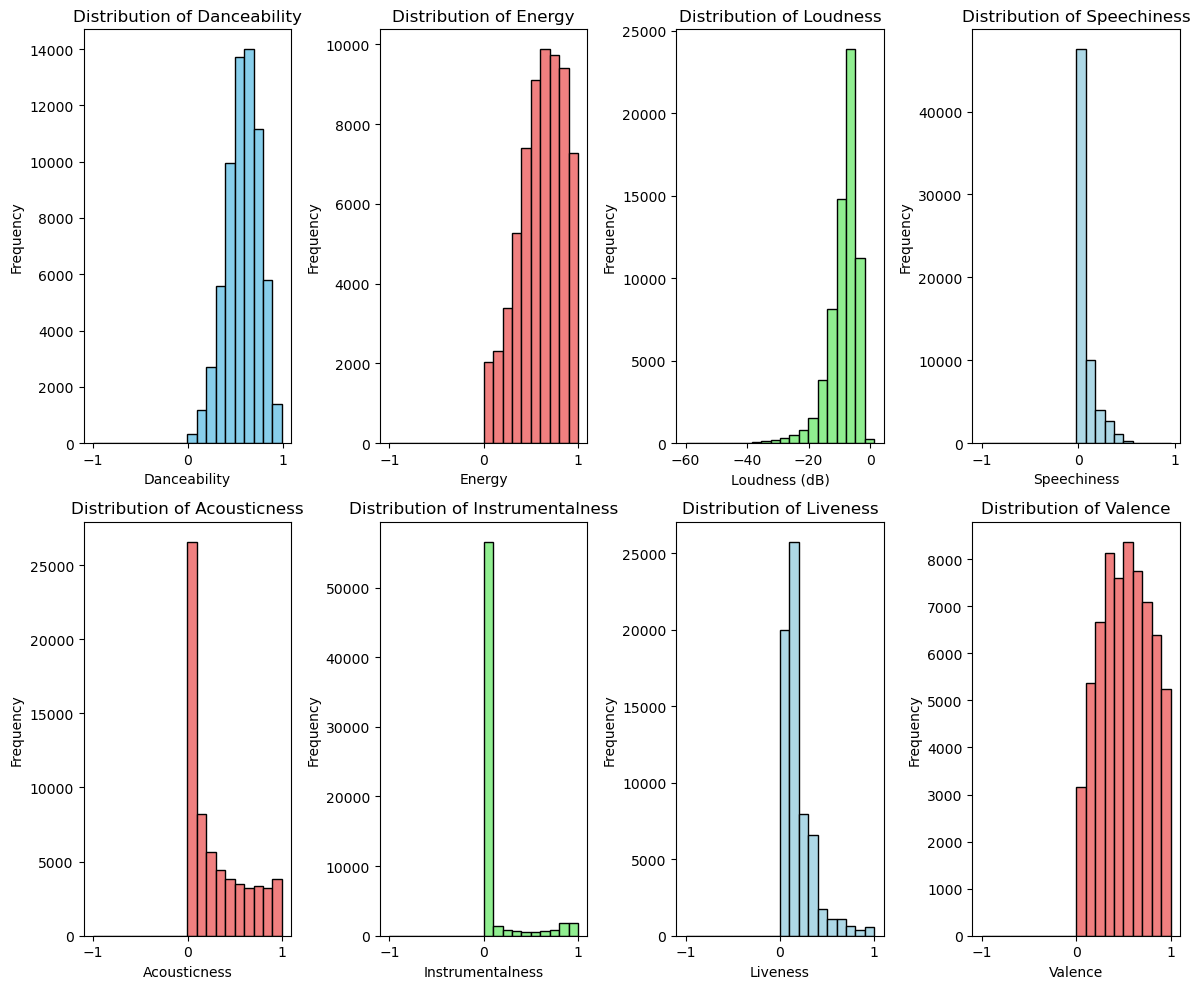

In [13]:
# Histogram for danceability
plt.figure(figsize=(12, 10))
plt.subplot(2, 4, 1)
plt.hist(danceability, bins=20,color='skyblue',edgecolor='black')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')

# Histogram for Energy
plt.subplot(2, 4, 2)
plt.hist(energy, bins=20,color='lightcoral',edgecolor='black')
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')

# Histogram for Loudness
plt.subplot(2, 4, 3)
plt.hist(loudness, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Loudness')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frequency')

# Histogram for Speechiness
plt.subplot(2, 4, 4)
plt.hist(speechiness, bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Frequency')

# Histogram for Acousticness
plt.subplot(2, 4,5)
plt.hist(acousticness, bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')

# Histogram for Instrumentalness
plt.subplot(2,4, 6)
plt.hist(instrumentalness, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Frequency')

# Histogram for Liveness
plt.subplot(2,4,7)
plt.hist(liveness, bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Liveness')
plt.xlabel('Liveness')
plt.ylabel('Frequency')

# Histogram for Valence
plt.subplot(2, 4,8)
plt.hist(valence, bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Valence')
plt.xlabel('Valence')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [15]:
selected_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                     'instrumentalness', 'liveness', 'valence', 'acousticness_artist',
                     'danceability_artist', 'energy_artist', 'instrumentalness_artist',
                     'liveness_artist', 'speechiness_artist', 'valence_artist']

In [16]:
scaler =StandardScaler()
Songs_df1[selected_features] =scaler.fit_transform(Songs_df1[selected_features])

In [17]:
nn_model = NearestNeighbors(n_neighbors=6, metric='cosine')

In [18]:
nn_model.fit(Songs_df1[selected_features])

NearestNeighbors(metric='cosine', n_neighbors=6)

In [19]:
example_song_name = "Blinding Lights"

In [20]:
song_index = Songs_df1[Songs_df1['name'] == example_song_name].index[0]

In [21]:
example_song_features = Songs_df1.iloc[song_index][selected_features].values

In [22]:
distances, indices = nn_model.kneighbors([example_song_features])

c:\Users\tarun\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [23]:
recommended_song_indices = [  idx for idx in indices[0]
                                   if idx != song_index  ]


In [24]:
recommended_songs = Songs_df1.iloc[recommended_song_indices]

In [25]:
print("Recommended Songs:")
for _, song in recommended_songs[['name', 'artist']].iterrows():
    print(f"{song['name']} by {song['artist']}")

Recommended Songs:
Belong To The World by The Weeknd
The Birds Pt. 1 by The Weeknd
Honestly by Lil Peep
Ordinary Life by The Weeknd
Heaven Or Las Vegas by The Weeknd


In [26]:
import pickle
pickle.dump(Songs_df1, open('Songs_df1.pkl', 'wb'))
pickle.dump(selected_features,open('selected_features.pkl', 'wb'))